In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from multiclass_helper import generate_dataset, draw_neural_net, plot_MC_boundaries_keras
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
# from keras.utils import to_categorical
import numpy as np

# Genero dataset

In [8]:
N = 100
mu_1 = [4, 4]
sigma_1 = [[  2,0.8],
           [0.8,  2]]

mu_2 = [0, 0]
sigma_2 = [[  3,  0],
           [  0,  3]]

mu_3 = [-4, -4]
sigma_3 = [[  2,  0],
           [  0,  2]]

X, y = generate_dataset([[mu_1, sigma_1, N], [mu_2, sigma_2, N],[mu_3, sigma_3, N]])

In [9]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

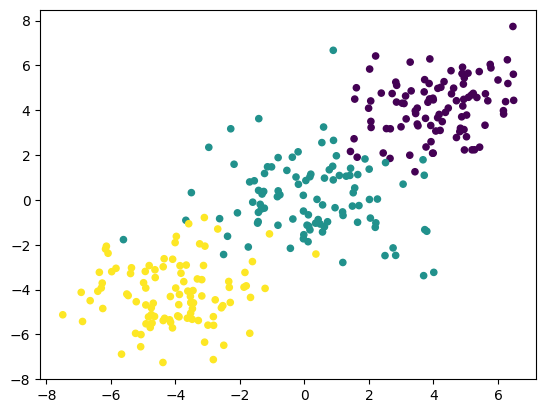

In [10]:
y_cat = to_categorical(y)
plt.scatter(X[:,0], X[:,1], c=y, s=20)
plt.show()

In [32]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Armamos modelo

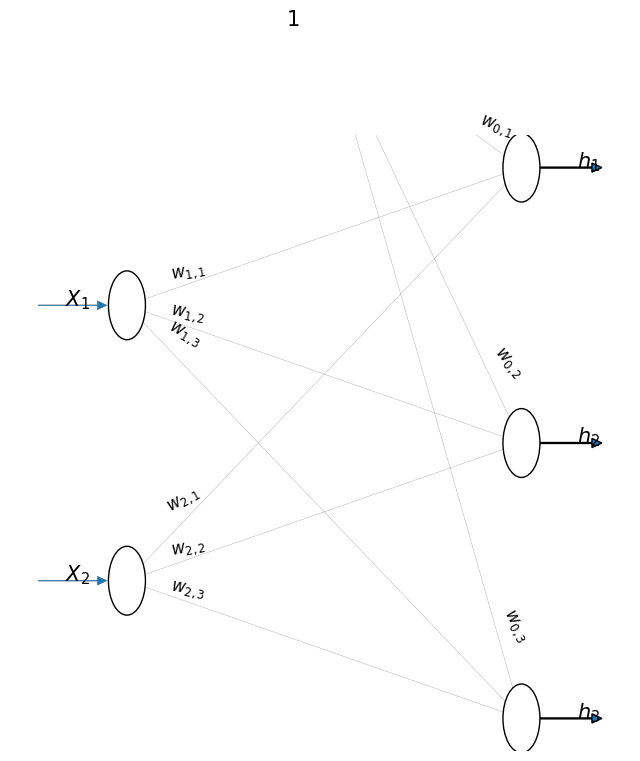

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [[ '$w_{0,1}$', '$w_{0,2}$', '$w_{0,3}$']]
capa_1 = [['$w_{1,1}$', '$w_{1,2}$', '$w_{1,3}$'],
          ['$w_{2,1}$', '$w_{2,2}$', '$w_{2,3}$'], 
          ['$w_{3,1}$', '$w_{3,2}$', '$w_{3,3}$']]
weights = [np.array(capa_1)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,3], weights, biases)
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [41]:
input_features = 2
output_size = y_cat.shape[1]
model = Sequential()
model.add(Dense(output_size,input_dim=input_features, activation='softmax', name="Capa_Oculta"))
model.summary()
lr = 0.04 

# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_Oculta (Dense)          (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [42]:
X.shape, y.shape

((300, 2), (300,))

In [43]:
batch_size = 20
epochs = 100
model.fit(X, 
          y_cat, 
          # batch_size = batch_size,
          epochs=epochs, 
          verbose=1
         )

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 1.0345 - accuracy: 0.4100
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.7600
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.7567
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.7400
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.7467
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8067
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.8633
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8900
Epoch 9/100
10/10 [==============================] - 0s 784us/step - loss: 0.2834 - accuracy: 0.9200
Epoch 10/100
10/10 [==============================] - 0s 790us/step - loss: 0.2794 - accuracy: 0.9300
Epoch

10/10 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9533


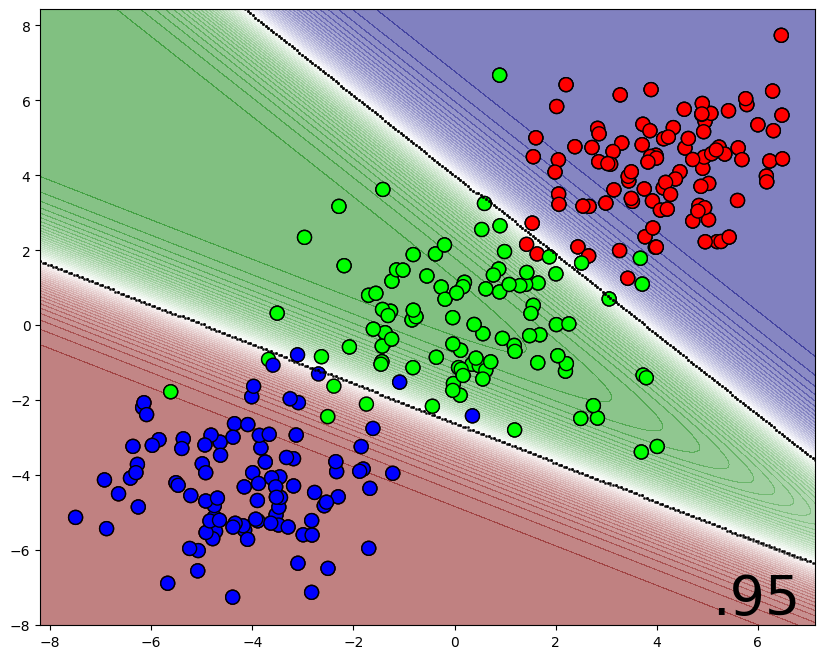

In [44]:
f, (ax1) = plt.subplots(1, 1, figsize=(10,8))
score = model.evaluate(X, y_cat)
plot_MC_boundaries_keras(X, y_cat, score[1], model.predict_proba, ax=ax1, mesh_res = 300)
plt.show()

In [45]:
model.predict([[0, -2.5]]).sum()

1.0

# Calculos manuales de h, p y loss

## Que parámetros aprendió el modelo?

In [28]:
model.get_weights()

[array([[ 2.1363952 ,  0.50800043, -0.40514213],
        [ 2.1214595 ,  0.769445  , -1.0865207 ]], dtype=float32),
 array([-2.9037232,  3.5035918, -1.9396238], dtype=float32)]

In [19]:
coefs_, intercept_ = model.get_weights()

In [20]:
coefs_

array([[ 0.6687301 ,  0.03322961, -0.8165493 ],
       [ 0.7324273 , -0.03990185, -0.5347706 ]], dtype=float32)

In [21]:
intercept_

array([-2.5055513 , -0.68893826, -2.2955642 ], dtype=float32)

In [46]:
coefs_ = np.array([
[ 1.2032 , 0.34239826, -0.3272417 ],
[ 1.4500312 , 0.54530275, -0.64213556]
])

In [47]:
intercept_ = np.array([-1.7683319, 1.8029612, -1.7188473])

## Probabilidad de observación

In [48]:
observ = np.array([[0, 2]])
print(observ)

[[0 2]]


In [17]:
probs = model.predict_proba(observ)
probs

array([[0.18277341, 0.81567025, 0.00155635]], dtype=float32)

In [18]:
# Cálculo de h_i
h_s = coefs_.T.dot(observ.reshape(-1,1)) + intercept_.reshape(-1,1)
h_s

array([[ 1.1317305 ],
       [ 2.8935667 ],
       [-3.00311842]])

In [19]:
p_ = np.exp(h_s) / np.exp(h_s).sum()
p_

array([[0.14621753],
       [0.85144224],
       [0.00234022]])

## Cálculo de loss

In [20]:
model.evaluate(observ, np.array([[1, 0, 0]]))

1/1 [==============================] - 0s 701us/step - loss: 1.6995 - accuracy: 0.0000e+00


[1.6995080709457397, 0.0]

In [21]:
- np.log(0.14621753)

1.9226598346136317

In [22]:
-np.log(0.14621753), -np.log(0.85144224)

(1.9226598346136317, 0.16082361441563886)

In [23]:
np.exp(-0.023281602)

0.9769873234479889

In [24]:
-np.log(0.9769873234479889)

0.023281601999999967